In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")

In [3]:
df.head(3)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0


In [4]:
df.shape

(1000, 14)

In [5]:
df["target"]

,target
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


In [6]:
df["target"].isnull().sum()

0

In [7]:
df.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [8]:
df["target"].value_counts()

,count
target,
1,580
0,420


In [9]:
#split features and target

X = df.drop(columns=["target", "patientid"], axis=1)

In [10]:
X.head(3)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0


In [11]:
y = df["target"]

In [12]:
y.head(3)

,target
0,1
1,0
2,0


In [13]:
#train - test split
#startify = y ensures equal ones and zeros proportionality
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)


In [14]:
print(X.shape, xtrain.shape, xtest.shape)
print(y.shape, ytrain.shape, ytest.shape)

(1000, 12) (800, 12) (200, 12)
(1000,) (800,) (200,)


In [15]:
#MODEL TRAINING: Logistic Regression as it is good for BINARY classification

model = LogisticRegression()

In [16]:
#Train "model" with training data

model.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#MODEL EVALUATION: 'accuracy score' is used

#accuracy of model on training data

xtrain_prediction = model.predict(xtrain)
trainingdata_accuracy = accuracy_score(xtrain_prediction, ytrain)

In [19]:
print(f"Training data accuracy between xtrain and ytrain is {(trainingdata_accuracy)*100} %")

Training data accuracy between xtrain and ytrain is 93.625 %


In [20]:
#accuracy of model on TEST data

xtest_prediction = model.predict(xtest)
testingdata_accuracy = accuracy_score(xtest_prediction, ytest)


In [21]:
print(f"Testing data accuracy between xtest and ytest is {(testingdata_accuracy)*100} %")

Testing data accuracy between xtest and ytest is 93.5 %


R² is more suited for regression tasks. For classification-based:

Accuracy
Precision, Recall, F1-score
AUC-ROC score

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

# Accuracy
accuracy_train = accuracy_score(ytrain, ytrain_pred)
accuracy_test = accuracy_score(ytest, ytest_pred)

# Precision, Recall, F1-score, AUC
precision = precision_score(ytest, ytest_pred)
recall = recall_score(ytest, ytest_pred)
f1 = f1_score(ytest, ytest_pred)
auc = roc_auc_score(ytest, model.predict_proba(xtest)[:, 1])  # For binary classification

# Print results
print(f"Accuracy (Train): {accuracy_train:.4f}")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Accuracy (Train): 0.9363
Accuracy (Test): 0.9350
Precision: 0.9328
Recall: 0.9569
F1-score: 0.9447
AUC-ROC: 0.9888


In [27]:
#PREDICTIVE SYSTEM that takes in inputs and delivers output as PROBLEM or NO PROBLEM:

input = [58,1,2,135,402,1,2,111,0,4,2,1]

#change the list to np.array
input = np.array(input)

#reshape the array as we are predicting for only one instance

input = input.reshape(1,-1)
prediction = model.predict(input)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
print(prediction)
if prediction[0] == 1: #[0] is index of the only element which is either 1 or 0
  print("The person probably has heart disease")
else:
  print("The person does not seem to have heart disease")

[1]
The person probably has heart disease


In [29]:
input = [20,1,0,132,356,0,0,127,0,4.3,1,1]

#change the list to np.array
input = np.array(input)

#reshape the array as we are predicting for only one instance

input = input.reshape(1,-1)
prediction = model.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
print(prediction)
if prediction[0] == 1: #[0] is index of the only element which is either 1 or 0
  print("The person probably has an underlying heart disease/risk")
else:
  print("The person does not seem to have heart disease")

[0]
The person does not seem to have heart disease


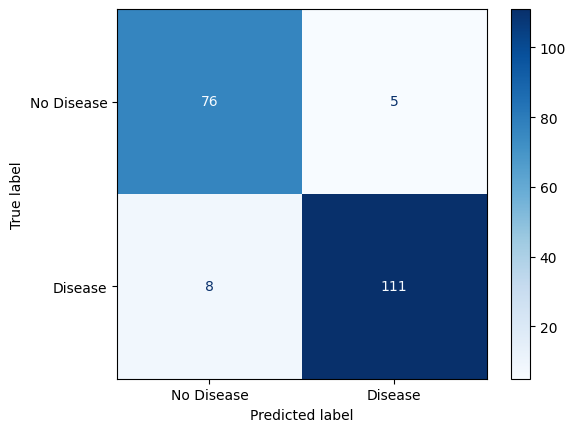

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(xtest_prediction, ytest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.show()


In [32]:
(5/76)*100
6.5789 - 100
#5 is 6.5% of 76. Thus, the test for no disease has accuracy of 93.5% as predicted. only 5/76 were wrongly predicted to HAVE disease or false positives

-93.4211

In [33]:
(8/111) * 100
7.20 - 100 #almost 93% DISEASE has DISEASE, only 8 out of 111 were false positives.

-92.8

#XGBOOST

In [35]:

from xgboost import XGBClassifier

In [36]:
model2 = XGBClassifier()

In [37]:
model2.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
# Predictions
ytrain_pred = model2.predict(xtrain)
ytest_pred = model2.predict(xtest)

# Accuracy
accuracy_train = accuracy_score(ytrain, ytrain_pred)
accuracy_test = accuracy_score(ytest, ytest_pred)

# Precision, Recall, F1-score, AUC
precision = precision_score(ytest, ytest_pred)
recall = recall_score(ytest, ytest_pred)
f1 = f1_score(ytest, ytest_pred)
auc = roc_auc_score(ytest, model2.predict_proba(xtest)[:, 1])  # For binary classification

# Print results
print(f"Accuracy (Train): {accuracy_train:.4f}")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Accuracy (Train): 1.0000
Accuracy (Test): 0.9800
Precision: 0.9746
Recall: 0.9914
F1-score: 0.9829
AUC-ROC: 0.9965


In [41]:
model2 = XGBClassifier(
    n_estimators=200,        # More trees for better learning
    max_depth=3,             # Reduce tree depth to prevent overfitting
    learning_rate=0.05,      # Lower learning rate for better generalization
    subsample=0.8,           # Use 80% of data per tree (reduces variance)
    colsample_bytree=0.8,    # Use 80% of features per tree (reduces correlation)
    gamma=1,                 # Regularization to reduce overfitting
    reg_lambda=2,            # L2 regularization (Ridge)
    reg_alpha=1,             # L1 regularization (Lasso)
    use_label_encoder=False,
    eval_metric="logloss"
)
model2.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [42]:
# Predictions
ytrain_pred = model2.predict(xtrain)
ytest_pred = model2.predict(xtest)

# Accuracy
accuracy_train = accuracy_score(ytrain, ytrain_pred)
accuracy_test = accuracy_score(ytest, ytest_pred)

# Precision, Recall, F1-score, AUC
precision = precision_score(ytest, ytest_pred)
recall = recall_score(ytest, ytest_pred)
f1 = f1_score(ytest, ytest_pred)
auc = roc_auc_score(ytest, model2.predict_proba(xtest)[:, 1])  # For binary classification

# Print results
print(f"Accuracy (Train): {accuracy_train:.4f}")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Accuracy (Train): 0.9850
Accuracy (Test): 0.9750
Precision: 0.9664
Recall: 0.9914
F1-score: 0.9787
AUC-ROC: 0.9948


#PREDICTIVE SYSTEM

In [43]:
#PREDICTIVE SYSTEM that takes in inputs and delivers output as PROBLEM or NO PROBLEM:
#XGBOOST
input = [26,1,2,185,194,0,2,147,0,2,1,2]

#change the list to np.array
input = np.array(input)

#reshape the array as we are predicting for only one instance

input = input.reshape(1,-1)
prediction = model2.predict(input)

print(prediction)
if prediction[0] == 1: #[0] is index of the only element which is either 1 or 0
  print("The person probably has heart disease")
else:
  print("The person does not seem to have heart disease")

[1]
The person probably has heart disease


Yes!

In [66]:
#FOR N GOPALAPILLAI

#PREDICTIVE SYSTEM that takes in inputs and delivers output as PROBLEM or NO PROBLEM:
#XGBOOST
#ORER OF the 12 inputs: age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels

input = [92, 1, 0, 95, 250, 0, 2, 65, 0, 3, 3, 2]

#change the list to np.array
input = np.array(input)

#reshape the array as we are predicting for only one instance

input = input.reshape(1,-1)
prediction = model2.predict(input)

print(prediction)
if prediction[0] == 1: #[0] is index of the only element which is either 1 or 0
  print("The person probably has heart disease")
else:
  print("The person does not seem to have heart disease")


[1]
The person probably has heart disease


#This model predicted that my Grandfather (Age 92) has CAD, which is actually true!

The inputs I fed were obtained from his recent admission to a nearby Medical College. He has had CAD for atleast 15 years.